In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score
import numpy as np

In [ ]:
df = pd.read_csv('detection_results.csv')
df['Detected'] = df['Detected'].apply(lambda x: True if str(x).lower() == 'true' else False if str(x).lower() == 'false' else x)

df

,Antipattern,Example,Model,Prompt,Detected
0,Ambigious Service,Museum,GPT-4o,Standard,True
1,Ambigious Service,Twilio,GPT-4o,Standard,True
2,API Versioning,Museum,GPT-4o,Standard,True
3,API Versioning,Twilio,GPT-4o,Standard,False
4,Service Chain,2PC,GPT-4o,Standard,False
5,Service Chain,Ledger,GPT-4o,Standard,False
6,Chatty Service,2PC,GPT-4o,Standard,False
7,Chatty Service,Ledger,GPT-4o,Standard,True
8,Nanoservices,Ecommerce,GPT-4o,Standard,True
9,Nanoservices,Video Processing,GPT-4o,Standard,False


In [57]:
def calculate_metrics(group):
    predictions = group['Detected']
    ground_truth = [True] * len(group)
    accuracy = accuracy_score(ground_truth, predictions)
    recall = recall_score(ground_truth, predictions)
    f1 = f1_score(ground_truth, predictions)
    return pd.Series({'Accuracy': accuracy, 'Recall': recall, 'F1 Score': f1})

metrics_by_prompt_model = df.groupby(['Prompt', 'Model']).apply(calculate_metrics)

metrics_by_prompt_model

Accuracy    Recall  F1 Score
Prompt      Model                                          
CoT+Example Claude 3.5 Sonnet  0.666667  0.666667  0.800000
            GPT-4o             0.500000  0.500000  0.666667
Standard    Claude 3.5 Sonnet  0.333333  0.333333  0.500000
            GPT-4o             0.500000  0.500000  0.666667

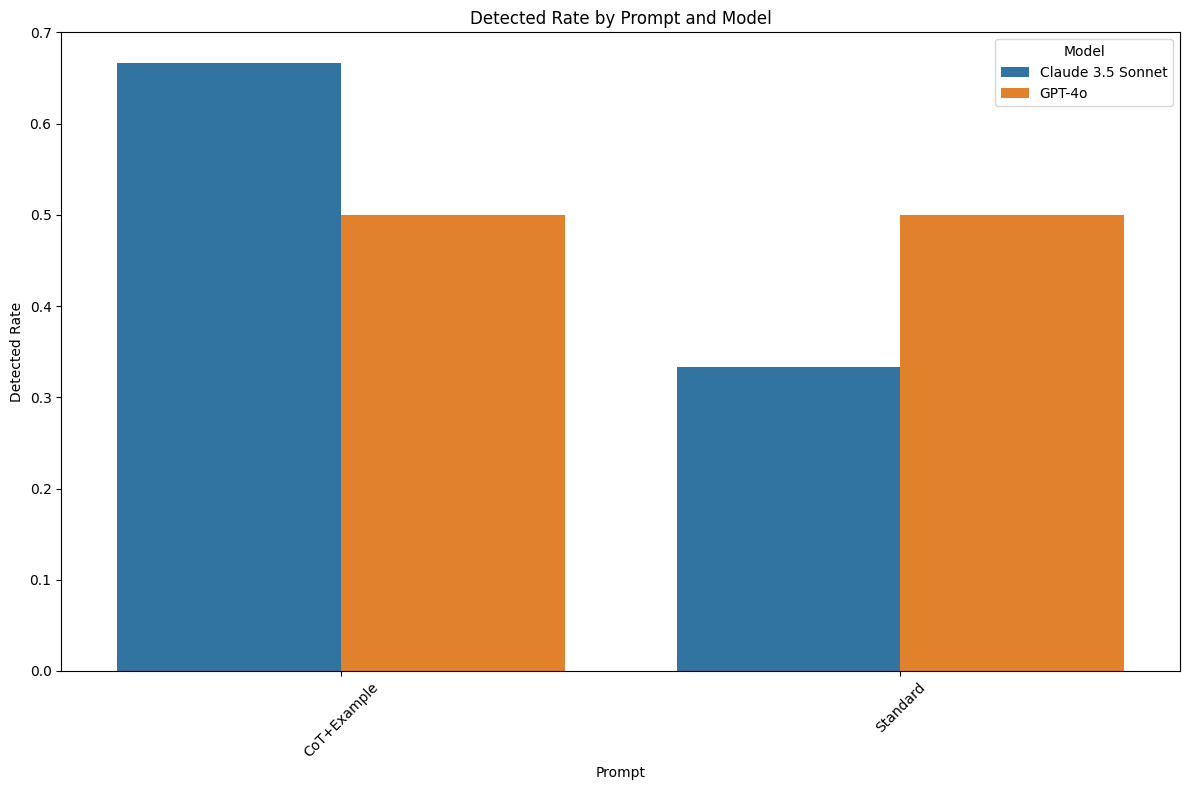

In [54]:
sns_data_prompt_model = df.groupby(['Prompt', 'Model'])['Detected'].mean().reset_index()


plt.figure(figsize=(12, 8))
sns.barplot(x='Prompt', y='Detected', hue='Model', data=sns_data_prompt_model)
plt.title('Detected Rate by Prompt and Model')
plt.xlabel('Prompt')
plt.ylabel('Detected Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()